In [ ]:
# Dataset: https://www.kaggle.com/datasets/gustavomodelli/forest-fires-in-brazil

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("amazon.csv", encoding = "iso-8859-1", parse_dates = ['date'])

In [3]:
df.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [4]:
# Display Top 5 Rows of The Dataset
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [5]:
# Check Last 5 Rows
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [6]:
# Find Shape of Our Dataset (Number of Rows And Number of Columns)
df.shape

(6454, 5)

In [7]:
print("Num of Rows:", df.shape[0])
print("Num of Columns:", df.shape[1])

Num of Rows: 6454
Num of Columns: 5


In [8]:
# Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [9]:
# Check For Duplicate Data and Drop Them
dup = df.duplicated().any()
print("Any duplicates in the data?", dup)

Any duplicates in the data? True


In [10]:
df = df.drop_duplicates()

In [11]:
dup = df.duplicated().any()
print("Any duplicates in the data?", dup)

Any duplicates in the data? False


In [12]:
# Check Null Values In The Dataset
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [13]:
import seaborn as sns

<Axes: >

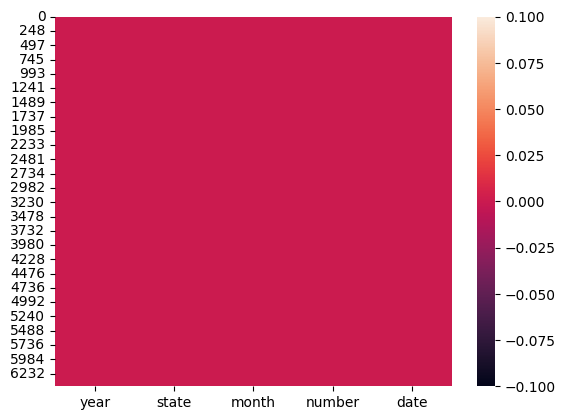

In [14]:
sns.heatmap(df.isnull())

In [15]:
# Get Overall Statistics About The Dataframe
df.describe(include = 'all')

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


In [16]:
# Rename Month Names To English
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [17]:
df['month_new'] = df['month'].map({'Janeiro': 'jan', 'Fevereiro':'feb', 'Março':'mar', 'Abril': 'apr', 'Maio': 'may', \
                                   'Junho': 'jun', 'Julho':'july', 'Agosto': 'august', 'Setembro': 'sep', 'Outubro':'oct', 'Novembro':\
                                   'nov', 'Dezembro': 'dec'})

In [18]:
df.head()

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan
3,2001,Acre,Janeiro,0.0,2001-01-01,jan
4,2002,Acre,Janeiro,0.0,2002-01-01,jan


In [19]:
# Total Number of Fires Registered
fires = df['number'].astype(int).sum()
print("Total Num of Fires:", fires)

Total Num of Fires: 698438


In [20]:
# In Which Month Maximum Number of Forest Fires Were Reported?
data1 = df.groupby('month_new')['number'].sum().reset_index()
data1

,month_new,number
0,apr,28184.770
1,august,88050.435
2,dec,57535.480
3,feb,30839.050
4,jan,47681.844
5,july,92319.113
6,jun,55997.675
7,mar,30709.405
8,may,34725.363
9,nov,85508.054


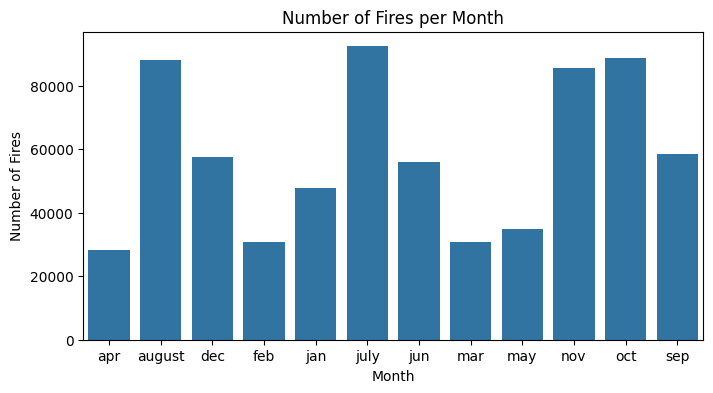

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,4))
plt.title("Number of Fires per Month")
plt.xlabel("Month")
plt.ylabel("Number of Fires")
sns.barplot(x = 'month_new', y = 'number', data = data1)
plt.show()

In [22]:
# In Which Year Maximum Number of Forest Fires Was Reported?
data2 = df.groupby('year')['number'].sum().reset_index()
data2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


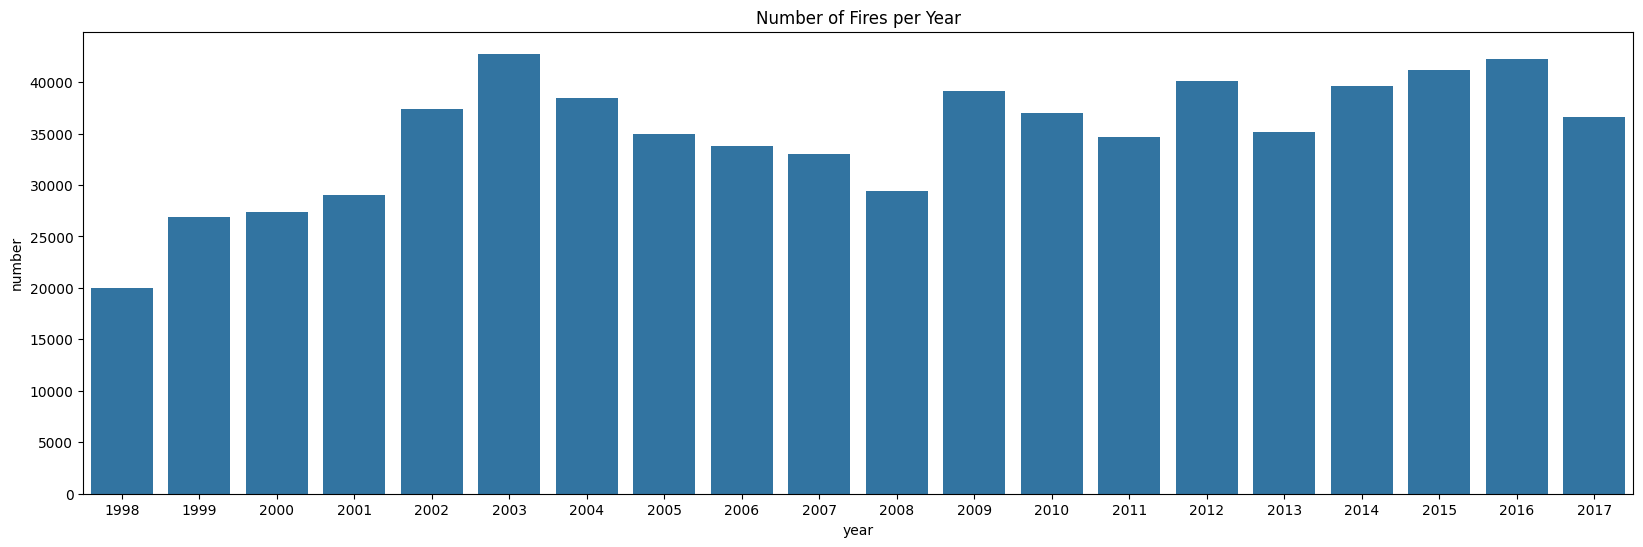

In [23]:
plt.figure(figsize = (20,6))
plt.title("Number of Fires per Year")
sns.barplot(x = 'year' , y = 'number',data = data2)
plt.show()

In [24]:
# In Which State Maximum Number of Forest Fires Was Reported?
data3 = df.groupby('state')['number'].sum().reset_index()

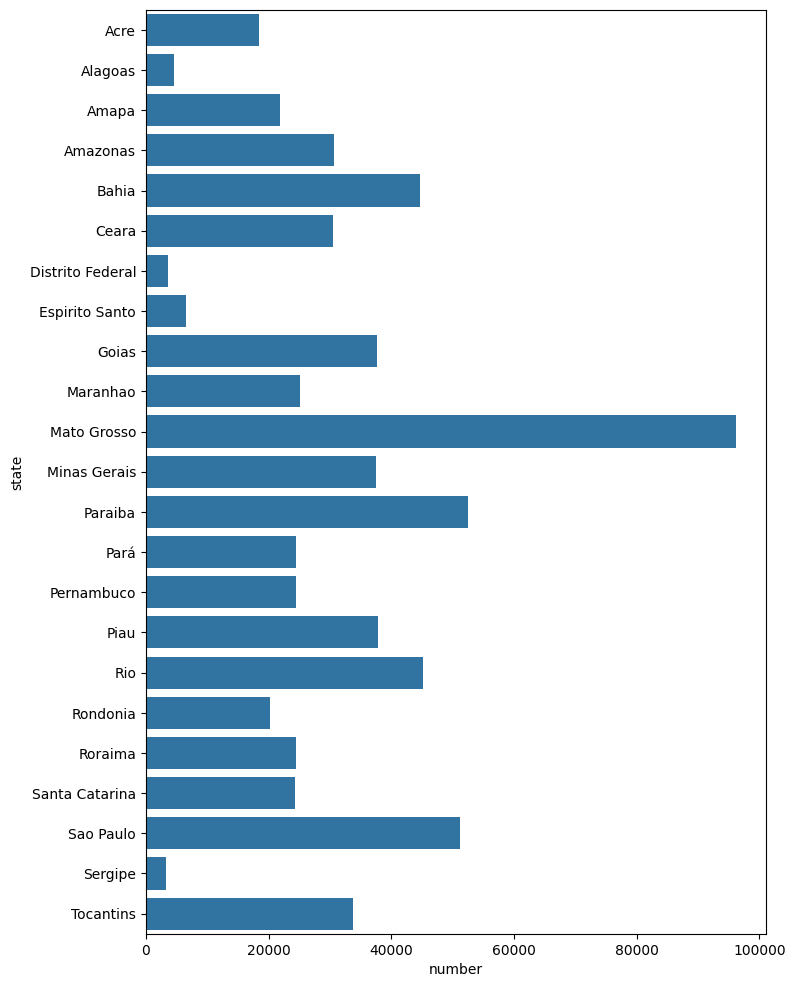

In [25]:
plt.figure(figsize = (8,12))
sns.barplot(y = 'state', x = 'number', data = data3)
plt.show()

In [26]:
# Find Total Number of Fires Were Reported In Amazonas
df[df['state'] == 'Amazonas']['number'].sum().astype(int)

30650

In [30]:
 # Display Number of Fires Were Reported In Amazonas (Year-Wise)
amazonas = df[df['state'] == 'Amazonas']

In [33]:
amazonas1 = amazonas.groupby('year')['number'].sum().reset_index()
amazonas1

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<Axes: xlabel='year', ylabel='number'>

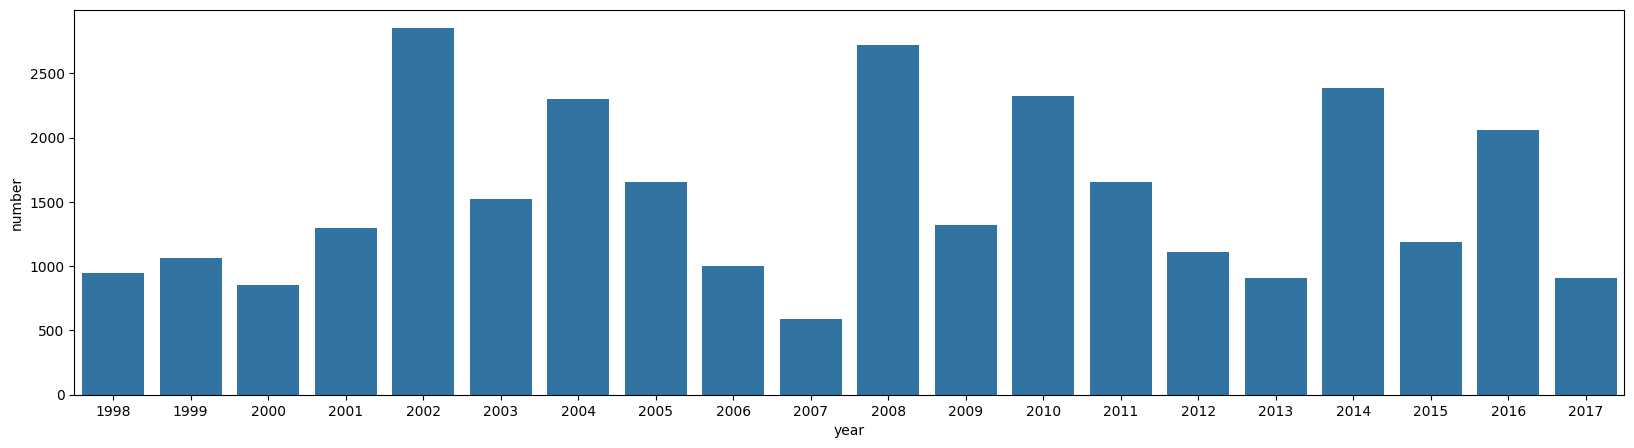

In [34]:
plt.figure(figsize = (20,5))
sns.barplot(x='year', y = 'number', data = amazonas1)

In [39]:
# Display Number of Fires Were Reported In Amazonas (Day-Wise)
data4 = df[df['state'] == 'Amazonas']
data4

,year,state,month,number,date,month_new
718,1998,Amazonas,Janeiro,0.0,1998-01-01,jan
719,1999,Amazonas,Janeiro,3.0,1999-01-01,jan
720,2000,Amazonas,Janeiro,7.0,2000-01-01,jan
721,2001,Amazonas,Janeiro,3.0,2001-01-01,jan
722,2002,Amazonas,Janeiro,17.0,2002-01-01,jan
...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,dec
953,2013,Amazonas,Dezembro,236.0,2013-01-01,dec
954,2014,Amazonas,Dezembro,293.0,2014-01-01,dec
955,2015,Amazonas,Dezembro,565.0,2015-01-01,dec


In [42]:
data5 = data4.groupby(data4['date'].dt.dayofweek)['number'].sum()

In [53]:
import calendar
day = [calendar.day_name[x] for x in range(0,7)]

In [54]:
day

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [55]:
data5.index = day

In [60]:
data5 = data5.reset_index()


,level_0,index,number
0,0,Monday,1886.601
1,1,Tuesday,6474.217
2,2,Wednesday,3910.177
3,3,Thursday,5754.802
4,4,Friday,5446.480
5,5,Saturday,4162.666
6,6,Sunday,3015.186


In [64]:
data5 = data5.drop('level_0',axis =1)

<Axes: xlabel='index', ylabel='number'>

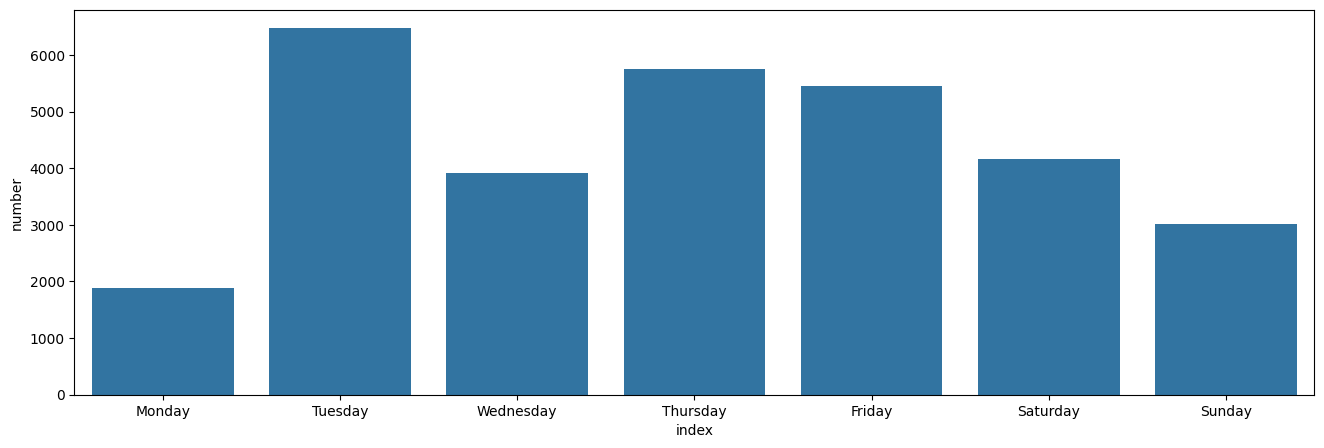

In [67]:
plt.figure(figsize = (16,5))
sns.barplot(x = 'index', y = 'number', data = data5)

In [72]:
# Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’
data7 = df[df['year'] == 2015]
data7

,year,state,month,number,date,month_new
17,2015,Acre,Janeiro,1.000,2015-01-01,jan
37,2015,Acre,Fevereiro,2.000,2015-01-01,feb
57,2015,Acre,Março,2.000,2015-01-01,mar
77,2015,Acre,Abril,3.000,2015-01-01,apr
97,2015,Acre,Maio,2.000,2015-01-01,may
...,...,...,...,...,...,...
6372,2015,Tocantins,Agosto,2.540,2015-01-01,august
6392,2015,Tocantins,Setembro,5.510,2015-01-01,sep
6412,2015,Tocantins,Outubro,4.844,2015-01-01,oct
6432,2015,Tocantins,Novembro,833.000,2015-01-01,nov


In [76]:
data8 = data7.groupby('month_new')['number'].sum().reset_index()
data8

,month_new,number
0,apr,2573.000
1,august,4363.125
2,dec,4088.522
3,feb,2309.000
4,jan,4635.000
5,july,4364.392
6,jun,3260.552
7,mar,2202.000
8,may,2384.000
9,nov,4034.518


<Axes: xlabel='month_new', ylabel='number'>

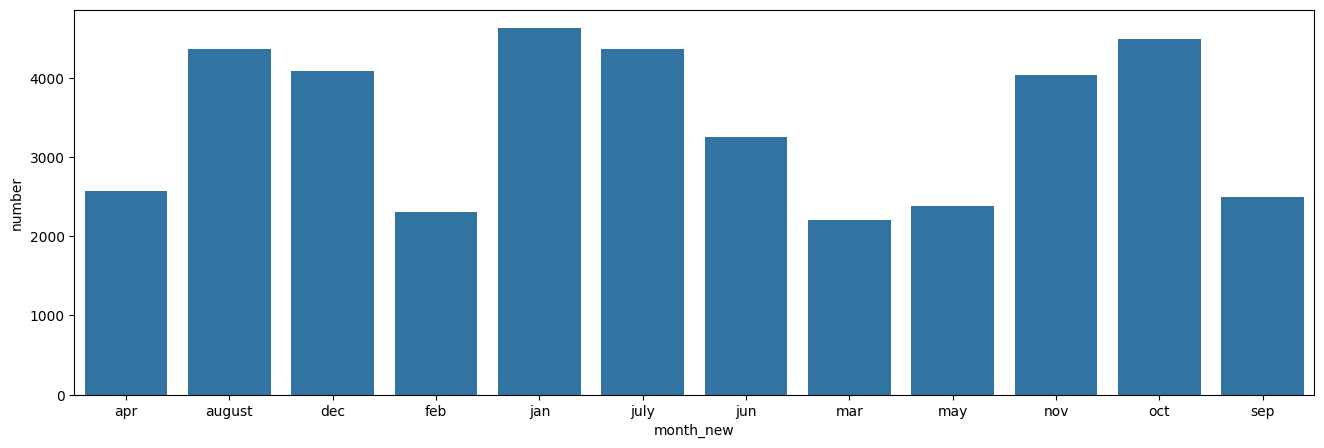

In [78]:
plt.figure(figsize = (16,5))
sns.barplot(x = 'month_new', y = 'number', data = data8)

In [81]:
# Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)
fire = df.groupby('state')['number'].mean().sort_values(ascending = False).reset_index()
fire

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


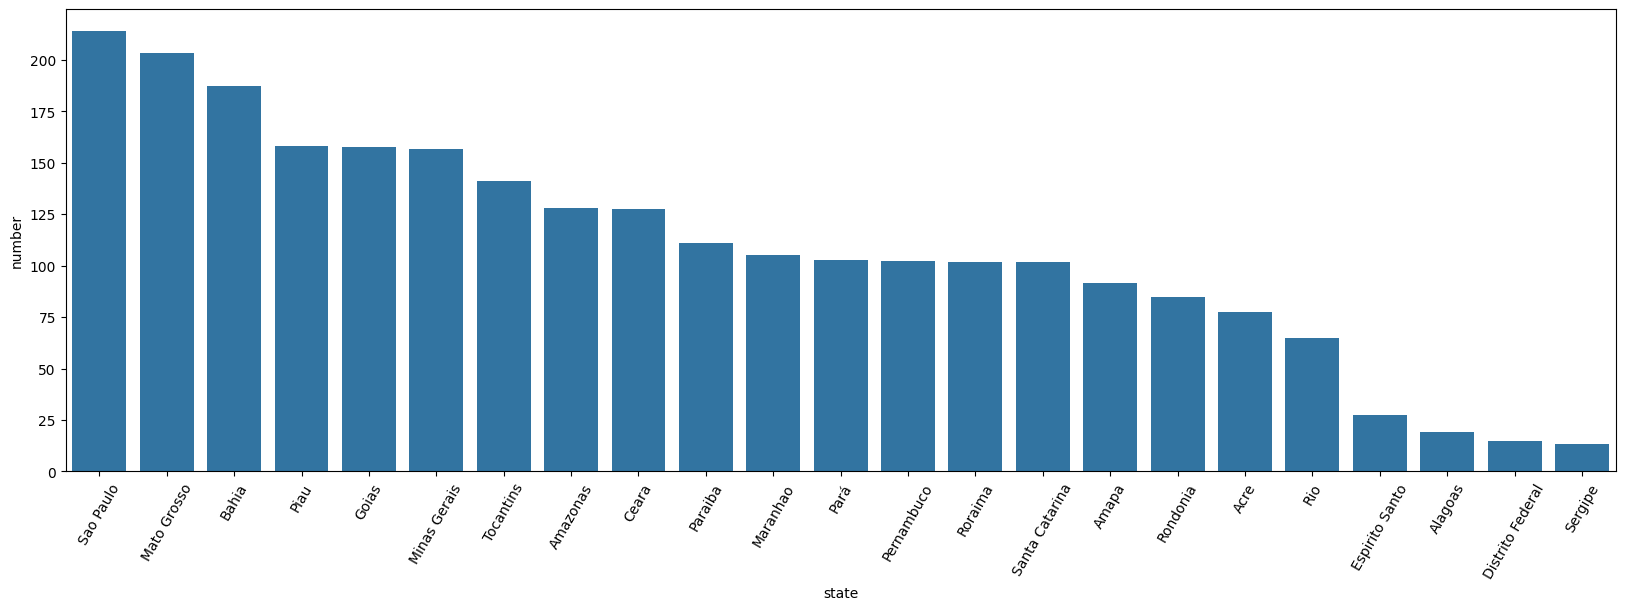

In [88]:
plt.figure(figsize = (20,6))
plt.xticks(rotation = 60)
sns.barplot(x='state', y = 'number',data = fire)
plt.show()

In [94]:
# Find The State Names Where Fires Were Reported In 'Dec' Month
df[df['month_new'] == 'dec']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)